In [1]:
from tabulate import tabulate
from copy import deepcopy
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Algoritmo método dicotomia

In [34]:
def bisection_method(f, xa, xb, error, i=0, output_lines = []):
    """
    Implementa o método da bisseção para encontrar o zero de uma função.

    Args:
        f: a função a ser avaliada.
        xa: o ponto inicial do intervalo.
        xb: o ponto final do intervalo.
        error: a tolerância para o erro absoluto na solução.
        i: o número de iterações realizadas.
        output_lines: uma lista de tuplas com informações sobre as iterações realizadas.
    
    Returns:
        Uma lista de tuplas com informações sobre as iterações realizadas.
    """

    # Inverte xa e xb se f(xb) for menor que f(xa)
    if f(xb) < f(xa):
        xa, xb = xb, xa
    
    i += 1
    nxa = xa
    nxb = xb
    
    # Encontra o ponto médio do intervalo
    xc = (xa + xb) / 2
    f_xc = f(xc)

    # Atualiza os limites do intervalo
    if f_xc < 0:
        nxa = xc
    else:
        nxb = xc

    # Adiciona informações sobre a iteração à lista de saída
    output_lines.append([i, xa, xb, xc, f_xc, [round(nxa, 4), round(nxb, 4)], abs(f_xc)])
    
    # Verifica se a solução é precisa o suficiente
    if abs(f_xc) < error:
        return output_lines

    # Recursivamente chama a função com os novos limites do intervalo
    return bisection_method(f, nxa, nxb, error=error, i=i, output_lines=output_lines)


def print_bisection_table(results, tablefmt=None):
    """
    Imprime a tabela com informações sobre as iterações do método da bisseção.

    Args:
        results: uma lista de tuplas com informações sobre as iterações realizadas.
        tablefmt: o formato da tabela a ser usado para impressão.
    """
    headers = ['Iter.', 'x_a', 'x_b', 'x_c', 'f(x_c)', 'Novo Intervalo', 'erro']
    floatfmt = '.4f'
    
    print(tabulate(results, headers=headers, floatfmt=floatfmt, tablefmt=tablefmt))

#### 1. Determine, pelo método da dicotomia, a raiz da função $f(x) = x³ − x² − 1$ com uma precisão de 3 casas decimais

In [36]:
def f1(x):
    return x**3 - x**2 - 1

output = bisection_method(f1, 1, 2, 1e-3, 0, [])
print_bisection_table(output)

  Iter.     x_a     x_b     x_c    f(x_c)  Novo Intervalo      erro
-------  ------  ------  ------  --------  ----------------  ------
      1  1.0000  2.0000  1.5000    0.1250  [1, 1.5]          0.1250
      2  1.0000  1.5000  1.2500   -0.6094  [1.25, 1.5]       0.6094
      3  1.2500  1.5000  1.3750   -0.2910  [1.375, 1.5]      0.2910
      4  1.3750  1.5000  1.4375   -0.0959  [1.4375, 1.5]     0.0959
      5  1.4375  1.5000  1.4688    0.0112  [1.4375, 1.4688]  0.0112
      6  1.4375  1.4688  1.4531   -0.0432  [1.4531, 1.4688]  0.0432
      7  1.4531  1.4688  1.4609   -0.0162  [1.4609, 1.4688]  0.0162
      8  1.4609  1.4688  1.4648   -0.0026  [1.4648, 1.4688]  0.0026
      9  1.4648  1.4688  1.4668    0.0043  [1.4648, 1.4668]  0.0043
     10  1.4648  1.4668  1.4658    0.0009  [1.4648, 1.4658]  0.0009


#### 2. Sabe-se que a função $f(x) = x + 3 − 2^x$ tem uma raiz no intervalo [1; 3]. Use o método da dicotomia e encontre o valor da raiz com 3 casas decimais

In [37]:
def f2(x): 
    return x + 3 - 2**x

output = bisection_method(f2, 1, 3, 1e-3, 0, [])
print_bisection_table(output)

  Iter.     x_a     x_b     x_c    f(x_c)  Novo Intervalo      erro
-------  ------  ------  ------  --------  ----------------  ------
      1  3.0000  1.0000  2.0000    1.0000  [3, 2.0]          1.0000
      2  3.0000  2.0000  2.5000   -0.1569  [2.5, 2.0]        0.1569
      3  2.5000  2.0000  2.2500    0.4932  [2.5, 2.25]       0.4932
      4  2.5000  2.2500  2.3750    0.1876  [2.5, 2.375]      0.1876
      5  2.5000  2.3750  2.4375    0.0205  [2.5, 2.4375]     0.0205
      6  2.5000  2.4375  2.4688   -0.0669  [2.4688, 2.4375]  0.0669
      7  2.4688  2.4375  2.4531   -0.0229  [2.4531, 2.4375]  0.0229
      8  2.4531  2.4375  2.4453   -0.0011  [2.4453, 2.4375]  0.0011
      9  2.4453  2.4375  2.4414    0.0097  [2.4453, 2.4414]  0.0097
     10  2.4453  2.4414  2.4434    0.0043  [2.4453, 2.4434]  0.0043
     11  2.4453  2.4434  2.4443    0.0016  [2.4453, 2.4443]  0.0016
     12  2.4453  2.4443  2.4448    0.0002  [2.4453, 2.4448]  0.0002


In [39]:
def successive_approx(x, phi_func, print_func, i=0, max_iter=20, error=1e-3):
    """
    Implementa o método de aproximação sucessiva para encontrar o ponto fixo de uma função.

    Args:
        x: o valor inicial de x.
        phi_func: a função de iteração.
        print_func: a função usada para imprimir informações sobre as iterações.
        i: o número de iterações realizadas.
        max_iter: o número máximo de iterações permitidas.
        error: a tolerância para o erro absoluto na solução.

    Returns:
        O valor aproximado do ponto fixo da função.
    """
    i += 1
    # Calcula o próximo valor de x usando a função de iteração.
    phi_x = phi_func(x)
    # Calcula o erro absoluto.
    err = abs(x - phi_x)

    # Imprime informações sobre a iteração atual.
    print_func(i, x, phi_x, err)

    # Verifica se o erro é menor que a tolerância.
    if err < error:
        print(f'\nConverged to x={x:.4f}')
        return phi_x 

    # Verifica se o número máximo de iterações foi atingido.
    if i == max_iter:
        print('Diverged')
        return None

    # Chama a função novamente com o próximo valor de x.
    return successive_approx(phi_x, phi_func, print_func, i=i, max_iter=max_iter)

#### 3. Determine, pelo método de aproximações sucessivas, a raiz da função $f(x) = x^3 − 2x^2 + 2x − 1$ próxima de $x0 = 2$

Definindo $φ(x) = x = (x^3 − 2x^2 − 1) ∗ (−0.5)$, temos, sucessivamente:

In [40]:
def phi(x):
    return (x**3 - 2*x**2 - 1)*(-1/2)

def print_line(i, x, phi_x, error):
    print(f"x_{i} = φ(x_{i-1}) = (({x:.3f})^3 - 2*({x:.3f})^2 - 1)*(-0.5) = {phi_x:.3f}, error = {error:.4f}")

x0 = 2
xs = successive_approx(x0, phi, print_line)

x_1 = φ(x_0) = ((2.000)^3 - 2*(2.000)^2 - 1)*(-0.5) = 0.500, error = 1.5000
x_2 = φ(x_1) = ((0.500)^3 - 2*(0.500)^2 - 1)*(-0.5) = 0.688, error = 0.1875
x_3 = φ(x_2) = ((0.688)^3 - 2*(0.688)^2 - 1)*(-0.5) = 0.810, error = 0.1227
x_4 = φ(x_3) = ((0.810)^3 - 2*(0.810)^2 - 1)*(-0.5) = 0.890, error = 0.0803
x_5 = φ(x_4) = ((0.890)^3 - 2*(0.890)^2 - 1)*(-0.5) = 0.940, error = 0.0494
x_6 = φ(x_5) = ((0.940)^3 - 2*(0.940)^2 - 1)*(-0.5) = 0.968, error = 0.0283
x_7 = φ(x_6) = ((0.968)^3 - 2*(0.968)^2 - 1)*(-0.5) = 0.984, error = 0.0154
x_8 = φ(x_7) = ((0.984)^3 - 2*(0.984)^2 - 1)*(-0.5) = 0.992, error = 0.0080
x_9 = φ(x_8) = ((0.992)^3 - 2*(0.992)^2 - 1)*(-0.5) = 0.996, error = 0.0041
x_10 = φ(x_9) = ((0.996)^3 - 2*(0.996)^2 - 1)*(-0.5) = 0.998, error = 0.0021
x_11 = φ(x_10) = ((0.998)^3 - 2*(0.998)^2 - 1)*(-0.5) = 0.999, error = 0.0010
x_12 = φ(x_11) = ((0.999)^3 - 2*(0.999)^2 - 1)*(-0.5) = 0.999, error = 0.0005

Converged to x=0.9989


#### Determine, pelo método de aproximações sucessivas, a raiz da função $f(x) = 2x − 1$. Usar $x0 = 1$ e

##### a) $φ(x) = (1 − 1.5 ∗ x)/0.5$

In [41]:
def phi(x):
    return (1-1.5*x)/0.5

def print_line(i, x, phi_x, error):
    print(f"x_{i} = φ(x_{i-1}) = (1 - 1.5*({x:.3f}))/0.5 = {phi_x:.3f}, error = {error:.4f}")

x0 = 1
xs = successive_approx(x0, phi, print_line, max_iter=7)

x_1 = φ(x_0) = (1 - 1.5*(1.000))/0.5 = -1.000, error = 2.0000
x_2 = φ(x_1) = (1 - 1.5*(-1.000))/0.5 = 5.000, error = 6.0000
x_3 = φ(x_2) = (1 - 1.5*(5.000))/0.5 = -13.000, error = 18.0000
x_4 = φ(x_3) = (1 - 1.5*(-13.000))/0.5 = 41.000, error = 54.0000
x_5 = φ(x_4) = (1 - 1.5*(41.000))/0.5 = -121.000, error = 162.0000
x_6 = φ(x_5) = (1 - 1.5*(-121.000))/0.5 = 365.000, error = 486.0000
x_7 = φ(x_6) = (1 - 1.5*(365.000))/0.5 = -1093.000, error = 1458.0000
Diverged


##### b) $φ(x) = (1 − 0.5 ∗ x)/1.5$

In [42]:
def phi(x):
    return (1-0.5*x)/1.5

def print_line(i, x, phi_x, error):
    print(f"x_{i} = φ(x_{i-1}) = (1 - 0.5*({x:.3f}))/1.5 = {phi_x:.3f}, error = {error:.4f}")

x0 = 1
xs = successive_approx(x0, phi, print_line)

x_1 = φ(x_0) = (1 - 0.5*(1.000))/1.5 = 0.333, error = 0.6667
x_2 = φ(x_1) = (1 - 0.5*(0.333))/1.5 = 0.556, error = 0.2222
x_3 = φ(x_2) = (1 - 0.5*(0.556))/1.5 = 0.481, error = 0.0741
x_4 = φ(x_3) = (1 - 0.5*(0.481))/1.5 = 0.506, error = 0.0247
x_5 = φ(x_4) = (1 - 0.5*(0.506))/1.5 = 0.498, error = 0.0082
x_6 = φ(x_5) = (1 - 0.5*(0.498))/1.5 = 0.501, error = 0.0027
x_7 = φ(x_6) = (1 - 0.5*(0.501))/1.5 = 0.500, error = 0.0009

Converged to x=0.5007


In [43]:
def newton_raphson(x, f, df, i=0, error=1e-4, output_lines=[]):
    """
    Implementa o método de Newton-Raphson para encontrar raízes de uma função.

    Args:
        x: o valor inicial de x.
        f: a função a ser encontrada a raiz.
        df: a derivada da função f.
        i: o número de iterações realizadas.
        error: a tolerância para o erro absoluto na solução.
        output_lines: uma lista que armazena as informações sobre cada iteração.

    Returns:
        Uma lista que armazena as informações sobre cada iteração.
    """
    i += 1
    # Calcula o próximo valor de x usando o método de Newton-Raphson.
    x1 = x - f(x)/df(x)
    
    # Adiciona as informações da iteração atual na lista output_lines.
    output_lines.append([i, x, x1, f(x1)])
    
    # Verifica se a solução foi encontrada com a tolerância desejada.
    if abs(f(x1)) <= error:
        return output_lines
    
    # Chama a função recursivamente com o próximo valor de x.
    return newton_raphson(x1, f, df, i, error=error, output_lines=output_lines)

def print_newton_table(output_table, tablefmt=None):
    print(tabulate(output_table, headers=['Iter.', 'x_k', 'x_{k+1}', 'f(x_{k+1})'],  floatfmt='.3f', tablefmt=tablefmt))

#### Repita o exercício 3 anterior utilizando o método de Newton-Raphson
Utilizando Newton-Raphson, temos que:

$x_{k+1} = x_k − \frac{f(x_k)}{f'(x_k)}$

Então, \
$f(x) = x^3 − 2x^2 + 2x − 1$ \
$f'(x) = 3x^2 − 4x + 2$

In [44]:
def f(x):
    return x**3 - 2*x**2 + 2*x -1

def df(x):
    return 3*x**2 - 4*x + 2

x0 = 2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)

  Iter.    x_k    x_{k+1}    f(x_{k+1})
-------  -----  ---------  ------------
      1  2.000      1.500         0.875
      2  1.500      1.182         0.221
      3  1.182      1.031         0.032
      4  1.031      1.001         0.001
      5  1.001      1.000         0.000


#### 6. Determine, pelo método de Newton-Raphson a raiz da função $f(x) = (sin(x) − x/2)^2$ próxima de $x = π/2$

Temos que $f'(x) = 2 ∗ (sin(x) − x/2) ∗ (cos(x) − 1/2)$. Aplicando o método de Newton para o ponto $x = π/2$

In [45]:
import numpy as np

def f(x):
    return (np.sin(x)-x/2)**2

def df(x):
    return 2*(np.sin(x) - x/2) * (np.cos(x) - 1/2)

x0 = np.pi/2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)

  Iter.    x_k    x_{k+1}    f(x_{k+1})
-------  -----  ---------  ------------
      1  1.571      1.785         0.007
      2  1.785      1.845         0.002
      3  1.845      1.871         0.000
      4  1.871      1.883         0.000


#### 7. Escrever a equação recursiva do método de Newton-Raphson para determinar as raízes da equação
$f(x) = x^2 − 1 = 0$

#### (a) Usar a derivada exata para $f′(x)$

Temos que $f'(x) = 2x$, portanto:

$x_{k+1} = x_k − \frac{x_k^2 - 1}{2x_k}$

$x_{k+1} = \frac{x_k^2 + 1}{2x_k}$

In [46]:
def f(x):
    return x**2 - 1
def df(x):
    return 2*x

x0 = 2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)
print()
x0 = -2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)

  Iter.    x_k    x_{k+1}    f(x_{k+1})
-------  -----  ---------  ------------
      1  2.000      1.250         0.562
      2  1.250      1.025         0.051
      3  1.025      1.000         0.001
      4  1.000      1.000         0.000

  Iter.     x_k    x_{k+1}    f(x_{k+1})
-------  ------  ---------  ------------
      1  -2.000     -1.250         0.562
      2  -1.250     -1.025         0.051
      3  -1.025     -1.000         0.001
      4  -1.000     -1.000         0.000


#### b) usar a derivada aproximada, com passo h = 0.1

In [47]:
def df(x,h=0.1):
    return (f(x+h)-f(x))/h

x0 = 2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)
print()
x0 = -2
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)

  Iter.    x_k    x_{k+1}    f(x_{k+1})
-------  -----  ---------  ------------
      1  2.000      1.268         0.609
      2  1.268      1.037         0.076
      3  1.037      1.002         0.005
      4  1.002      1.000         0.000
      5  1.000      1.000         0.000

  Iter.     x_k    x_{k+1}    f(x_{k+1})
-------  ------  ---------  ------------
      1  -2.000     -1.231         0.515
      2  -1.231     -1.013         0.026
      3  -1.013     -0.999        -0.001
      4  -0.999     -1.000         0.000


#### 8. Determine, pelos métodos da dicotomia, aproximações sucessivas e Newton-Raphson a raiz quadrada de 2

Temos que\
$f(x) = x - \sqrt{2} = 0$ \
$f'(x) = 1$ \
e tentativas iniciais $X_0 = 10$

Por dicotomia, sabemos que se $1^2 = 1$ e $2^2 = 4$, então a raiz de $f(x)$ está no intervalo $[1, 2]$. Aplicando o método, temos:

In [48]:
def f(x):
    return x-np.sqrt(2)

output = bisection_method(f, 1, 2, 1e-3, 0, [])
print_bisection_table(output)

  Iter.     x_a     x_b     x_c    f(x_c)  Novo Intervalo      erro
-------  ------  ------  ------  --------  ----------------  ------
      1  1.0000  2.0000  1.5000    0.0858  [1, 1.5]          0.0858
      2  1.0000  1.5000  1.2500   -0.1642  [1.25, 1.5]       0.1642
      3  1.2500  1.5000  1.3750   -0.0392  [1.375, 1.5]      0.0392
      4  1.3750  1.5000  1.4375    0.0233  [1.375, 1.4375]   0.0233
      5  1.3750  1.4375  1.4062   -0.0080  [1.4062, 1.4375]  0.0080
      6  1.4062  1.4375  1.4219    0.0077  [1.4062, 1.4219]  0.0077
      7  1.4062  1.4219  1.4141   -0.0002  [1.4141, 1.4219]  0.0002


Pelo método de aproximações sucessivas, podemos usar

$φ(x) = \frac{\sqrt{2} + x}{2}$

In [49]:
def phi(x):
    return (2**0.5 + x)/2

def print_line(i, x, phi_x, error):
    print(f"x_{i} = φ(x_{i-1}) = (√2+({x:.3f}))/2 = {phi_x:.3f}, error = {error:.4f}")

x0 = 10
xs = successive_approx(x0, phi, print_line)

x_1 = φ(x_0) = (√2+(10.000))/2 = 5.707, error = 4.2929
x_2 = φ(x_1) = (√2+(5.707))/2 = 3.561, error = 2.1464
x_3 = φ(x_2) = (√2+(3.561))/2 = 2.487, error = 1.0732
x_4 = φ(x_3) = (√2+(2.487))/2 = 1.951, error = 0.5366
x_5 = φ(x_4) = (√2+(1.951))/2 = 1.683, error = 0.2683
x_6 = φ(x_5) = (√2+(1.683))/2 = 1.548, error = 0.1342
x_7 = φ(x_6) = (√2+(1.548))/2 = 1.481, error = 0.0671
x_8 = φ(x_7) = (√2+(1.481))/2 = 1.448, error = 0.0335
x_9 = φ(x_8) = (√2+(1.448))/2 = 1.431, error = 0.0168
x_10 = φ(x_9) = (√2+(1.431))/2 = 1.423, error = 0.0084
x_11 = φ(x_10) = (√2+(1.423))/2 = 1.418, error = 0.0042
x_12 = φ(x_11) = (√2+(1.418))/2 = 1.416, error = 0.0021
x_13 = φ(x_12) = (√2+(1.416))/2 = 1.415, error = 0.0010
x_14 = φ(x_13) = (√2+(1.415))/2 = 1.415, error = 0.0005

Converged to x=1.4153


Pelo método de Newton, dadas $f(x)$ e $f'(x)$, temos a seguinte iteração:

In [50]:
def f(x):
    return x-2**0.5
def df(x):
    return 1

x0 = 10
output = newton_raphson(x0, f, df, output_lines=[])
print_newton_table(output)

  Iter.    x_k    x_{k+1}    f(x_{k+1})
-------  -----  ---------  ------------
      1     10      1.414         0.000


#### 9. Determine, pelo método de Newton-Raphson a solução do sistema
$F(x, y) = 10 − x^2 − y = 0$

$G(x, y) = 15 − e^x − y = 0$

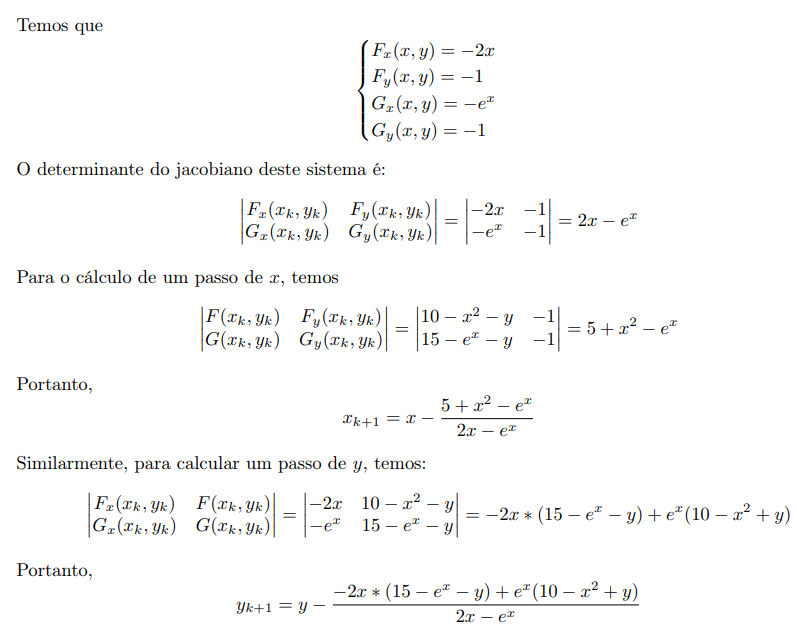

In [51]:
e = np.e

def f(x,y):
    return 10-x**2-y

def g(x,y):
    return 15-e**x-y

def f_x(x):
    return -2*x

def f_y(y):
    return -1

def g_x(x):
    return -e**x

def g_y(y):
    return -1

def det_jacob(x,y):
    return f_x(x)*g_y(y) - f_y(y)*g_x(x)

# função que calcula o próximo valor de x
def x_k1(x,y):
    return x - ((g_y(y)*f(x,y)) - (g(x,y)*f_y(y)))/(det_jacob(x,y))

# função que calcula o próximo valor de y
def y_k1(x,y):
    return y - ((f_x(x)*g(x,y)) - (f(x,y)*g_x(x)))/(det_jacob(x,y))

# definição do erro máximo
error = 1

# definição dos valores iniciais para x e y
x = 10
y = 10

# inicialização do contador de iterações
i=0

# inicialização da lista que irá guardar os resultados
out_list = []

# loop que executa até que o erro seja menor do que 0.001
while error >= 0.001:
    i += 1
    
    # cálculo do próximo valor de x e y
    next_x = x_k1(x, y)
    next_y = y_k1(x, y)
    
    # cálculo do valor de f(x,y) no próximo ponto
    f_xy_k1 = f(next_x, next_y)
    
    # cálculo do erro
    error = abs(f_xy_k1)
    
    # adição dos resultados na lista de saída
    out_list.append([i, x, next_x, y, next_y, f_xy_k1])
    
    # atualização dos valores de x e y
    x = next_x
    y = next_y
    
print(tabulate(out_list, headers = ['Iter.', 'x_k', 'x_{k+1}', 'y_k', 'y_{k+1}', 'F(x_{k+1},y_{k+1})'], floatfmt='.3f'))

  Iter.     x_k    x_{k+1}      y_k    y_{k+1}    F(x_{k+1},y_{k+1})
-------  ------  ---------  -------  ---------  --------------------
      1  10.000      9.004   10.000    -70.077                -0.992
      2   9.004      8.012  -70.077    -53.213                -0.983
      3   8.012      7.030  -53.213    -38.455                -0.965
      4   7.030      6.066  -38.455    -25.869                -0.929
      5   6.066      5.137  -25.869    -15.525                -0.863
      6   5.137      4.269  -15.525     -7.471                -0.753
      7   4.269      3.502   -7.471     -1.679                -0.588
      8   3.502      2.894   -1.679      1.993                -0.370
      9   2.894      2.512    1.993      3.835                -0.146
     10   2.512      2.372    3.835      4.391                -0.019
     11   2.372      2.357    4.391      4.447                -0.000


#### 10 Verifique se o sistema linear seguinte satisfaz ao critério de convergência de Gauss-Seidel

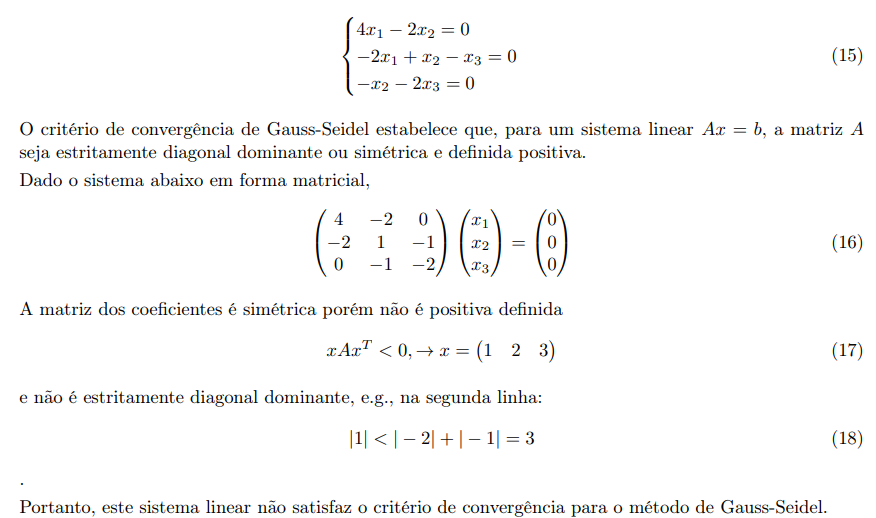

In [52]:
def gauss_seidel(A, b, guess, n, output_table):
    # Incrementa a contagem de iterações em 1
    n+=1
    # Se a contagem de iterações for igual a 21, retorna a tabela de saída
    if n==21:
        return output_table
    
    # Cria uma lista com a contagem de iterações e o palpite atual
    out = [n] + list(guess)
    # Cria uma cópia do palpite atual
    next_iter = deepcopy(guess)
    
    # Itera sobre as linhas da matriz A e seus índices
    for idx, line in enumerate(A):
        # Calcula o próximo palpite para a coordenada x[idx]
        next_guess_x = (b[idx] + np.dot(-np.delete(line, idx),np.delete(guess, idx)))/line[idx]
        # Armazena o próximo palpite no novo palpite
        next_iter[idx] = next_guess_x
    
    # Calcula a diferença absoluta entre o novo palpite e o palpite atual
    delta = np.sum((np.abs(next_iter-guess)))
    
    # Adiciona o novo palpite e a diferença à lista de saída
    out += list(next_iter) + [delta]
    output_table.append(out)

    # Se a diferença for menor que 1e-3, retorna a tabela de saída
    if abs(delta) <= 1e-3:
        return output_table

    # Se não, chama a função recursivamente com o novo palpite
    return gauss_seidel(A, b, next_iter, n=n, output_table=output_table)

#### 11. Resolva o sistema linear pelo método iterativo de Gauss-Seidel. Verifique, antes de resolver o sistema, se ele satisfaz o critério de convergência

$$4x_1 - 2x_2 - x_3 = 10$$
$$-2x_1 + 9x_2 - 5x_4 = -5$$
$$-x_1 + 6x_2 - 3x_4 = 0$$
$$-5x_2 - 3x_3 + 10x_4 = 0$$

In [53]:
matrix = np.array(
[[4, -2, -1, 0, -10],
[-2,  9, 0, -5,   5],
[-1,  0, 6, -3,   0],
[ 0, -5, -3, 10,  0],], dtype=float)

A = np.array([line[:-1] for line in matrix], dtype=float)
b = np.array([-line[-1] for line in matrix], dtype=float)

output_table = gauss_seidel(A, b, np.array([0.5,]*4), n=0, output_table=[])

print(tabulate(output_table, headers=['x1_k', 'x2_k', 'x3_k', 'x4_k', 'x1_k1', 'x2_k1', 'x3_k1', 'x4_k1', 'delta'], floatfmt='.3f'))

      x1_k    x2_k    x3_k    x4_k    x1_k1    x2_k1    x3_k1    x4_k1    delta
--  ------  ------  ------  ------  -------  -------  -------  -------  -------
 1   0.500   0.500   0.500   0.500    2.875   -0.167    0.333    0.400    3.308
 2   2.875  -0.167   0.333   0.400    2.500    0.306    0.679    0.017    1.576
 3   2.500   0.306   0.679   0.017    2.823    0.009    0.425    0.357    1.213
 4   2.823   0.009   0.425   0.357    2.611    0.270    0.649    0.132    0.920
 5   2.611   0.270   0.649   0.132    2.797    0.098    0.501    0.329    0.703
 6   2.797   0.098   0.501   0.329    2.674    0.249    0.631    0.199    0.534
 7   2.674   0.249   0.631   0.199    2.782    0.150    0.545    0.314    0.407
 8   2.782   0.150   0.545   0.314    2.711    0.237    0.621    0.238    0.309
 9   2.711   0.237   0.621   0.238    2.774    0.179    0.571    0.305    0.236
10   2.774   0.179   0.571   0.305    2.732    0.230    0.615    0.261    0.179
11   2.732   0.230   0.615   0.261    2.

#### 12 Repita o exercício anterior pelo método de triangularização

In [56]:
def print_matrix(matrix):
    # Essa função recebe uma matriz e imprime seus elementos formatados em formato de tabela
    # Imprime os elementos de cada linha da matriz separados por uma tabulação, e na última coluna é adicionado um pipe
    # Depois da última coluna é adicionado o valor do vetor de soluções da equação correspondente
    # Exemplo de formato de saída:
    # -- 
    # 1.00	2.00	3.00	| 4.00
    # 4.00	5.00	6.00	| 7.00
    # 7.00	8.00	9.00	| 10.00
    # --
    print('--')
    for i in matrix:
        # Converte cada elemento da linha para uma string formatada pelo método float_formatter, que foi definido em outra parte do código
        s = "\t".join(map(float_formatter, i[:-1]))
        # Imprime a linha formatada seguida pelo valor do vetor de soluções correspondente
        print(f'\t{s}\t | {float_formatter(i[-1])}')
    print('--')

def normalize_matrix(matrix):
    # Essa função recebe uma matriz e normaliza cada linha dividindo todos os elementos pelo valor do elemento na diagonal principal da linha
    # Se o elemento na diagonal for zero, a função não faz nada para essa linha
    # Depois de normalizar cada linha, a matriz resultante é retornada
    print_matrix(matrix)
    for idx, line in enumerate(matrix):
        if line[idx] == 0:
            continue
        # Calcula o fator de escala para normalização da linha
        factor = line[idx]
        print(f"dividindo a linha {idx+1} por {factor:.2f}")
        # Divide todos os elementos da linha pelo fator de escala
        matrix[idx] /= factor
    return matrix

def reverse_triang_matrix(matrix, p):
    """
    Recebe uma matriz 'matrix' já triangularizada superiormente e um índice 'p'
    que indica o ponto de referência para a triangulação. A função executa uma
    sequência de operações elementares de linha para zerar todos os elementos
    abaixo da diagonal principal. Quando terminar, a matriz resultante será a
    matriz triangular inferior equivalente. Retorna a matriz triangular inferior.
    """
    if p == 1:
        # Quando o ponto de referência é o primeiro elemento (superior esquerdo),
        # a matriz é normalizada dividindo cada linha pela sua diagonal.
        # Retorna a matriz normalizada.
        return normalize_matrix(matrix)
    
    # Mostra a matriz atual em cada iteração
    print_matrix(matrix)

    # Encontra o índice da linha de referência (última linha ainda não
    # triangularizada) e o pivô na posição p-1,p-1
    idx_ref_line = -(len(matrix)-p+1)
    pivot = matrix[p-1][p-1]
    
    # Se o pivô for igual a zero, não é possível triangularizar
    # e a função é chamada novamente com um índice 'p' menor
    if pivot == 0:
        print("Item na diagonal = 0")
        return reverse_triang_matrix(matrix, p-1)

    # Executa operações elementares de linha para zerar os elementos abaixo
    # do pivô, na coluna 'p-1', nas linhas abaixo da linha de referência
    m = matrix[:idx_ref_line]
    for idx, line in enumerate(m):
        b = -line[p-1]
        k = b/pivot
        if k == 0:
            continue
        line = line + k*matrix[idx_ref_line]
        # Mostra a operação realizada em cada linha
        print(f"multiplicando a linha {p} por {b}/{pivot:.2f} = {k:.2f} e somando à linha {idx+1}")
        matrix[idx] = line

    # Chama a função novamente com um índice 'p' menor para
    # continuar a triangularização
    return reverse_triang_matrix(matrix, p-1)


def triang_matrix(matrix, p=0):
        
    # Se p é igual ao tamanho da matriz, então a triangularização reversa é iniciada
    if p == len(matrix):
        print('Começando triangularização reversa')
        return reverse_triang_matrix(matrix, p)
    
    # Imprime a matriz
    print_matrix(matrix)
    
    # Seleciona o elemento pivot, que é o elemento da diagonal principal na linha p
    pivot = matrix[p][p]

    # Se o elemento pivot for igual a zero, passa para a próxima coluna
    if pivot == 0:
        return triang_matrix(matrix, p+1)
    
    # Seleciona todas as linhas abaixo da linha p
    m = matrix[p+1:]

    for idx, line in enumerate(m):
        # Seleciona o elemento abaixo do pivot na linha idx+p+1
        b = -line[p]
        # Calcula o fator de multiplicação para transformar o elemento abaixo do pivot em zero
        k = b/pivot
        # Adiciona a linha multiplicada pelo fator de multiplicação ao pivot
        line = line + k*matrix[p]
        # Se o fator de multiplicação for igual a zero, não realiza nenhuma operação
        if k == 0:
            continue
        # Imprime a operação realizada
        print(f"multiplicando a linha {p+1} por {b}/{pivot:.2f} = {k:.2f} e somando à linha {p+2+idx}")
        # Substitui a linha idx+p+1 original pela nova linha
        matrix[p+1+idx] = line

    # Chama a função recursivamente, incrementando p em 1
    return triang_matrix(matrix, p+1)


In [57]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

matrix = np.array(
[[4, -2, -1, 0, -10],
[-2,  9, 0, -5,   5],
[-1,  0, 6, -3,   0],
[ 0, -5, -3, 10,  0],], dtype=float)


diag_matrix = triang_matrix(deepcopy(matrix))
print_matrix(diag_matrix)
print(np.linalg.solve(A,b))


--
	4.000	-2.000	-1.000	0.000	 | -10.000
	-2.000	9.000	0.000	-5.000	 | 5.000
	-1.000	0.000	6.000	-3.000	 | 0.000
	0.000	-5.000	-3.000	10.000	 | 0.000
--
multiplicando a linha 1 por 2.0/4.00 = 0.50 e somando à linha 2
multiplicando a linha 1 por 1.0/4.00 = 0.25 e somando à linha 3
--
	4.000	-2.000	-1.000	0.000	 | -10.000
	0.000	8.000	-0.500	-5.000	 | 0.000
	0.000	-0.500	5.750	-3.000	 | -2.500
	0.000	-5.000	-3.000	10.000	 | 0.000
--
multiplicando a linha 2 por 0.5/8.00 = 0.06 e somando à linha 3
multiplicando a linha 2 por 5.0/8.00 = 0.62 e somando à linha 4
--
	4.000	-2.000	-1.000	0.000	 | -10.000
	0.000	8.000	-0.500	-5.000	 | 0.000
	0.000	0.000	5.719	-3.312	 | -2.500
	0.000	0.000	-3.312	6.875	 | 0.000
--
multiplicando a linha 3 por 3.3125/5.72 = 0.58 e somando à linha 4
--
	4.000	-2.000	-1.000	0.000	 | -10.000
	0.000	8.000	-0.500	-5.000	 | 0.000
	0.000	0.000	5.719	-3.312	 | -2.500
	0.000	0.000	0.000	4.956	 | -1.448
--
Começando triangularização reversa
--
	4.000	-2.000	-1.000	0.000	 | 

#### 13. Determine manualmente a inversa da matriz:

In [58]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

def print_matrix(matrix):
    print('--')
    for i in matrix:
        s1 = "\t".join(map(float_formatter, i[:-3]))
        s2 = " ".join(map(float_formatter, i[-3:]))
        print(f'{s1}\t | {s2}')
    print('--')
    

def invert_matrix(matrix):
    sol = np.concatenate((matrix, np.identity(len(matrix)).T), axis=1)
    solved = triang_matrix(sol)
    return(solved)

matr = np.array(
[[2,0,-1],
 [3,1,2],
 [-1,0,1],
 
], dtype=float)
inv = invert_matrix(matr)
print_matrix(inv)

--
2.00	0.00	-1.00	 | 1.00 0.00 0.00
3.00	1.00	2.00	 | 0.00 1.00 0.00
-1.00	0.00	1.00	 | 0.00 0.00 1.00
--
multiplicando a linha 1 por -3.0/2.00 = -1.50 e somando à linha 2
multiplicando a linha 1 por 1.0/2.00 = 0.50 e somando à linha 3
--
2.00	0.00	-1.00	 | 1.00 0.00 0.00
0.00	1.00	3.50	 | -1.50 1.00 0.00
0.00	0.00	0.50	 | 0.50 0.00 1.00
--
--
2.00	0.00	-1.00	 | 1.00 0.00 0.00
0.00	1.00	3.50	 | -1.50 1.00 0.00
0.00	0.00	0.50	 | 0.50 0.00 1.00
--
Começando triangularização reversa
--
2.00	0.00	-1.00	 | 1.00 0.00 0.00
0.00	1.00	3.50	 | -1.50 1.00 0.00
0.00	0.00	0.50	 | 0.50 0.00 1.00
--
multiplicando a linha 3 por 1.0/0.50 = 2.00 e somando à linha 1
multiplicando a linha 3 por -3.5/0.50 = -7.00 e somando à linha 2
--
2.00	0.00	0.00	 | 2.00 0.00 2.00
0.00	1.00	0.00	 | -5.00 1.00 -7.00
0.00	0.00	0.50	 | 0.50 0.00 1.00
--
--
2.00	0.00	0.00	 | 2.00 0.00 2.00
0.00	1.00	0.00	 | -5.00 1.00 -7.00
0.00	0.00	0.50	 | 0.50 0.00 1.00
--
dividindo a linha 1 por 2.00
dividindo a linha 2 por 1.00
divid

#### 14. Aplicando o método de mínimos quadrados, ache o polinômio do segundo grau $y = a_0 + a_1x + a_2x^2$ que melhor se ajuste aos pontos da tabela

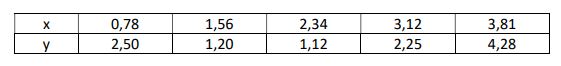

-  ----  -------
1  0.78   0.6084
1  1.56   2.4336
1  2.34   5.4756
1  3.12   9.7344
1  3.81  14.5161
-  ----  -------
[5.0221476 -4.0142602 1.0023414]


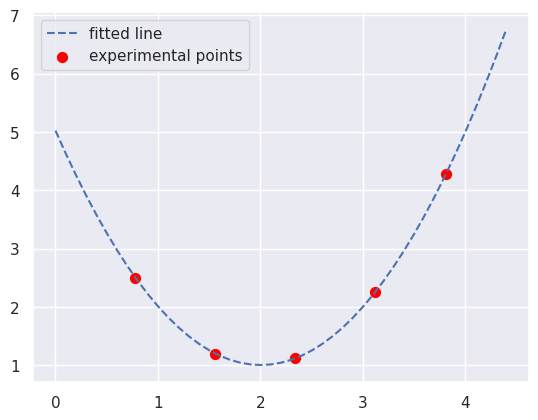

In [64]:
float_formatter = "{:.7f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


# Pontos experimentais
x_points = [0.78, 1.56, 2.34, 3.12, 3.81]
y_points = [2.5, 1.2, 1.12, 2.25, 4.28]

# Número de coeficientes para o polinômio
n = 3

# Construção da matriz Phi
phi_matrix = np.mat([[1, x, x**2] for x in x_points])

# Imprime a matriz Phi 
print(tabulate(np.array(phi_matrix)))

# Construção da matriz de resultados f
f_matrix = np.mat(y_points).T

# Cálculo dos coeficientes do polinômio
c = np.array(((phi_matrix.T*phi_matrix)**-1*phi_matrix.T)*f_matrix).flatten()

# Plotagem do gráfico com a reta ajustada e os pontos experimentais
plt.plot(np.arange(0,4.5,0.1), [c[0] + c[1]*x + c[2]*x**2 for x in np.arange(0,4.5,0.1)], 'b--', label='fitted line')
plt.scatter(x_points, y_points, s=50, c='red', label='experimental points')
plt.legend()
print(c)

#### 15. Ache a função do tipo $y = ax^b$ que melhor se ajuste aos pontos da tabela seguinte, usando o método de mínimos quadrados:
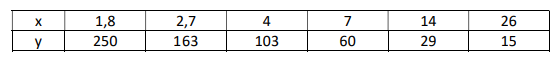

$log(y) = log(a) + b*log(x) \implies \hat{y} = c1  + c2*\hat{x}$

457.5466600222364 -1.0485870874888064


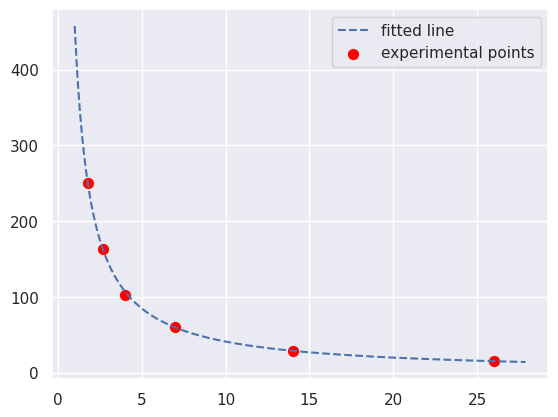

In [63]:
# Define os valores de x e y
x = [1.8, 2.7, 4, 7, 14, 26]
y = [250, 163, 103, 60, 29, 15]

# Aplica o logaritmo natural em x e y para linearizar a relação entre eles
x_hat = np.log(x)
y_hat = np.log(y)

# Define o grau do polinômio
n = 2

# Define a matriz de design (phi_matrix) com os valores de x_hat elevados às potências de 0 até n-1
phi_matrix = np.mat([[x**k for k in range(n)] for x in x_hat])

# Define a matriz coluna de saída (f_matrix) com os valores de y_hat
f_matrix = np.mat(y_hat).T

# Resolve o sistema de equações para encontrar os coeficientes c do polinômio
c = np.array(((phi_matrix.T*phi_matrix)**-1*phi_matrix.T)*f_matrix).flatten()

# Encontra os valores de a e b (exponencial dos coeficientes) para plotar a curva ajustada
a = np.exp(c[0])
b = c[1]

# Plota a curva ajustada e os pontos experimentais
plt.plot(np.arange(1,28,0.1), [a*x**b for x in np.arange(1,28,0.1)], 'b--', label='fitted line')
plt.scatter(x, y, s=50, c='red', label='experimental points')
plt.legend()
print(a,b)

#### 16. Determinar a função spline quadrática para interpolação de pontos intermediários na tabela
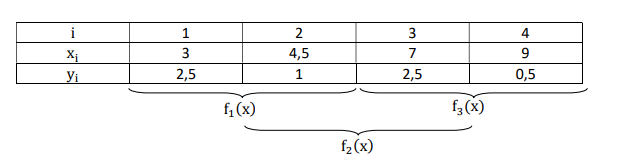

[0.4000000 -4.0000000 10.9000000 0.4000000 -4.0000000 10.9000000
 -1.3000000 19.8000000 -72.4000000]


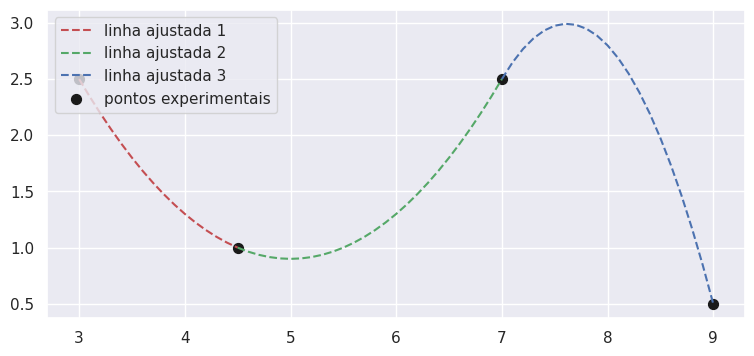

In [65]:
# Dados de entrada
x_points = [3, 4.5, 7, 9]
x1,x2,x3,x4 = x_points
y_points = [2.5, 1, 2.5, 0.5]
y1,y2,y3,y4 = y_points

# Montando a matriz A
A_matrix = np.matrix(
    [[x2**2, x2, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, x2**2, x2, 1, 0, 0, 0],
     [0, 0, 0, x3**2, x3, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, x3**2, x3, 1],
     [x1**2, x1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, x4**2, x4, 1],
     [2*x2, 1, 0, -2*x2, -1, 0, 0, 0, 0],
     [0, 0, 0, 2*x3, 1, 0, -2*x3, -1, 0],
     [1, 0, 0, -1, 0, 0, 0, 0, 0,]])

# Montando o vetor B
B = np.matrix([y2, y2, y3, y3, y1, y4, 0, 0, 0])

# Resolvendo o sistema linear
X = np.array(A_matrix**-1*B.T).flatten()

# Recuperando os coeficientes de cada parábola
a1, b1, c1, a2, b2, c2, a3, b3, c3 = X

# Plotando os resultados
plt.figure(figsize=(9,4))
plt.plot(np.arange(x1,x2+0.1,0.1), [a1*x**2 + b1*x + c1 for x in np.arange(x1,x2+0.1,0.1)], 'r--', label='linha ajustada 1')
plt.plot(np.arange(x2,x3+0.1,0.1), [a2*x**2 + b2*x + c2 for x in np.arange(x2,x3+0.1,0.1)], 'g--', label='linha ajustada 2')
plt.plot(np.arange(x3,x4+0.1,0.1), [a3*x**2 + b3*x + c3 for x in np.arange(x3,x4+0.1,0.1)], 'b--', label='linha ajustada 3')
plt.scatter(x_points, y_points, s=50, c='k', label='pontos experimentais')
plt.legend()
print(X)

In [66]:
def numerical_int(f, a, b, n_points):
    # Inicializa a soma total como 0
    total_sum = 0
    # Define o tamanho do intervalo
    dx = (b-a)/n_points
    # Inicializa a lista que armazenará os resultados
    output = []
    # Inicializa o contador de iterações
    i = 0
    # Itera sobre os pontos do intervalo, calculando as áreas dos trapézios
    for x in np.arange(a,b,dx):
        # Incrementa o contador de iterações
        i += 1
        # Calcula a área do trapézio
        si = dx*(f(x)+f(x+dx))/2
        # Adiciona a área do trapézio à soma total
        total_sum += si
        # Adiciona os resultados desta iteração à lista de resultados
        output.append([i, x, si, total_sum])
    # Retorna a lista de resultados
    return output


#### 17. Calcule numericamente, com 3 casas decimais, as integrais definidas:

a) $$\int_{0.2}^{0.4} \mathrm{e}^{-x^2},\mathrm{d}x$$

Usando o método do trapézio

In [67]:
def f(x):
    return e**-(x**2)

n_points = 10
a = 0.2
b = 0.4

output = numerical_int(f, a, b, n_points)
print(tabulate(output, headers=['n', 'x', 'dx*(f(x)+f(x+dx))/2', 'soma'], floatfmt='.4f'))


  n       x    dx*(f(x)+f(x+dx))/2    soma
---  ------  ---------------------  ------
  1  0.2000                 0.0191  0.0191
  2  0.2200                 0.0190  0.0381
  3  0.2400                 0.0188  0.0569
  4  0.2600                 0.0186  0.0755
  5  0.2800                 0.0184  0.0939
  6  0.3000                 0.0182  0.1120
  7  0.3200                 0.0179  0.1300
  8  0.3400                 0.0177  0.1477
  9  0.3600                 0.0174  0.1651
 10  0.3800                 0.0172  0.1823


b) $$\int_{0}^{3} \frac{1}{16+x^2},\mathrm{d}x$$

In [68]:
def f(x):
    return 1/(16+x**2)

n_points = 10
a = 0
b = 3
output = numerical_int(f, a, b, n_points)
print(tabulate(output, headers=['n', 'x', 'dx*(f(x)+f(x+dx))/2', 'soma'], floatfmt='.4f'))


  n       x    dx*(f(x)+f(x+dx))/2    soma
---  ------  ---------------------  ------
  1  0.0000                 0.0187  0.0187
  2  0.3000                 0.0185  0.0372
  3  0.6000                 0.0181  0.0553
  4  0.9000                 0.0175  0.0728
  5  1.2000                 0.0168  0.0896
  6  1.5000                 0.0160  0.1056
  7  1.8000                 0.0151  0.1208
  8  2.1000                 0.0142  0.1350
  9  2.4000                 0.0133  0.1484
 10  2.7000                 0.0124  0.1608
